# A_f_data_py_900 : 900 data points, that are generated by python script in cluster (diff. in range and no. of points)

due to [ERROR](https://github.com/darshan315/flow_past_cylinder_by_DRL/blob/master/notebooks/log.error_NumPy) in Numpy package data point structure is as follows : 


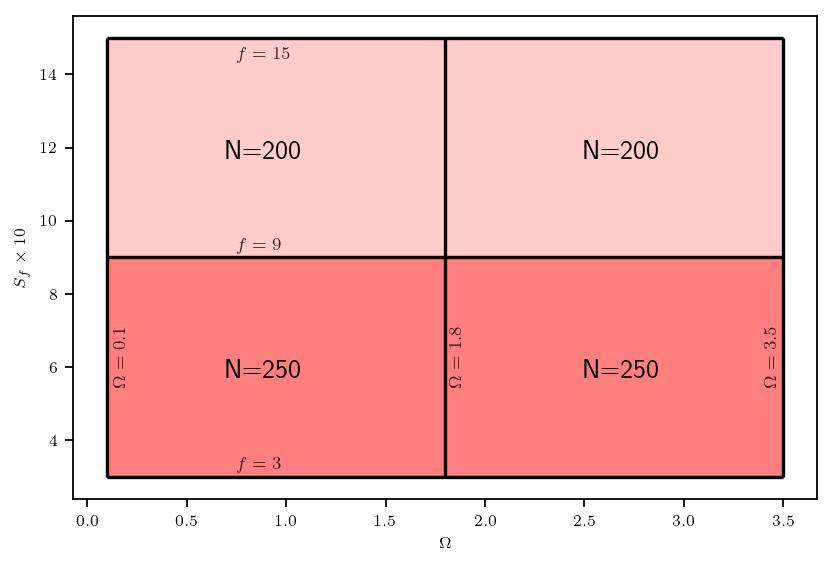

In [24]:
from os import walk
import numpy as np
import pickle
import matplotlib.patches as patches
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})

fig,ax = plt.subplots(1)
ax.vlines([0.1,1.8,3.5], ymin=3, ymax=15)
ax.hlines([3,9,15], xmin=0.1, xmax=3.5)
ax.add_patch(patches.Rectangle((0.1,3),1.7*2,6,linewidth=1,edgecolor='r',facecolor='r',alpha=0.5))
ax.add_patch(patches.Rectangle((0.1,9),1.7*2,6,linewidth=1,edgecolor='r',facecolor='r',alpha=0.2))
text1=np.asarray([[0.7,2.5,2.5,0.7],[5.7,5.7,11.7,11.7]]).transpose()
t1=['N=250','N=250','N=200','N=200']
text2=np.asarray([[0.13,1.82,3.4,0.75,0.75,0.75],[5.5,5.5,5.5,3.2,9.2,14.4],[90,90,90,0,0,0]]).transpose()
t2=[r"$\Omega = 0.1$",r"$\Omega = 1.8$",r"$\Omega = 3.5$",r"$f = 3$",r"$f = 9$",r"$f = 15$"]
for i, item in enumerate(text1):
    ax.text(item[0], item[1], t1[i], fontsize=12)
for i, item in enumerate(text2):
    ax.text(item[0], item[1], t2[i], rotation=item[2], fontsize=8, color='k', alpha=0.8)    
ax.set_xlabel(r"$\Omega$")
ax.set_ylabel(r"$S_f \times 10$")
plt.show()
fig.savefig('lhs_data_distribution.png')
from ipywidgets import *

### For data : [Download](https://cloudstorage.tu-braunschweig.de/getlink/fi6AwMozDdMHhwf6m2o2nJa3/data) 

In [25]:
'''
f_name = "/coefficient.dat"
fo_name = "./oscillatory_bounday_condition/lhs_data_py/"
(_,  cases, _) = next(walk(fo_name))

data = {}
for case in cases:
    data[case] = np.loadtxt(fo_name + case + f_name, unpack=True, usecols=[0, 1, 3])
     
pickle.dump(data, open('data_py.config', 'wb'))
'''

'\nf_name = "/coefficient.dat"\nfo_name = "./oscillatory_bounday_condition/lhs_data_py/"\n(_,  cases, _) = next(walk(fo_name))\n\ndata = {}\nfor case in cases:\n    data[case] = np.loadtxt(fo_name + case + f_name, unpack=True, usecols=[0, 1, 3])\n     \npickle.dump(data, open(\'data_py.config\', \'wb\'))\n'

In [26]:
A = []
f = []
c_d = []
c_l = []
c_d_max = []
c_d_min = []
c_l_max = []
c_l_min = []
with open(r"data_py.config", "rb") as file:
    data = pickle.load(file)

## DATA

In [27]:
tml  = (np.abs(list(data.values())[0][0] - 4.0)).argmin()

for key in data.keys():
    first, sec = key.split("-")
    A.append(float(first[1:]))
    f.append(float(sec[1:]))
    c_d.append(np.mean(data[key][1][tml:]))
    c_l.append(np.mean(data[key][2][tml:]))
    c_d_max.append(np.max(data[key][1][tml:]))
    c_d_min.append(np.min(data[key][1][tml:]))
    c_l_max.append(np.max(data[key][2][tml:]))
    c_l_min.append(np.min(data[key][2][tml:]))
A = np.asarray(A)
f = np.asarray(f)
c_d = np.asarray(c_d)
c_l = np.asarray(c_l)
c_d_max = np.asarray(c_d_max)
c_d_min = np.asarray(c_d_min)
c_l_max = np.asarray(c_l_max)
c_l_min = np.asarray(c_l_min)

In [39]:
def plot_data(array, lim):
    fig, (ax1) = plt.subplots(1, 1, figsize=(7, 7))
    levels = np.linspace(lim[0], lim[1], 200)
    levels_line = np.linspace(lim[0], lim[1], 40)
    cntr2 = ax1.tricontourf(A, f, array, levels=levels, cmap="jet")
    ax1.tricontour(A, f, array, levels=levels_line, linewidths=1)
    ax1.scatter(A, f, s=1, color ='k')
    ax1.set_ylabel(r"$S_f \times 10$", fontsize=12)
    ax1.set_xlabel(r"$\Omega$", fontsize=12)
    ax1.set_ylim(4.8,14)
    ax1.tick_params(labelsize=12)
    cbar=fig.colorbar(cntr2, ax=ax1)
    cbar.ax.tick_params(labelsize=12)
    cbar.ax.set_ylabel(r"$\Phi$", fontsize=14)
    plt.subplots_adjust(hspace=0.5)

    fig.savefig('LHS_data_vis.png')

## **metric-1**
$ \large \Phi = {\omega}_{1} (\sqrt{{\bar C_d}^2 + {\bar C_l}^2}) + {\omega}_{2} \ \sqrt { (C_{d_{max}}-C_{d_{min}})^2 +  (C_{l_{max}}-C_{l_{min}})^2 }  $

where, $\bar C_d$ = mean value of $C_d$, $\bar C_l$ = mean value of $C_l$

In [40]:
cd_uc = [3.14741, 3.17212, 3.19653] # [cd_min, cd_mean, cd_max]
cl_uc = [-0.904919, -0.0126599, 0.878955] # [cl_min, cl_mean, cl_max]
uc_val = ((cd_uc[1]**2+cl_uc[1]**2)**.5) + (((cd_uc[2]-cd_uc[0])**2+(cl_uc[2]-cl_uc[0])**2)**.5)
uc_val

4.95669540830038

The  minima of the plot lies at value = 0.747 with Ω = 2.357 and Sf×10 = 7.381


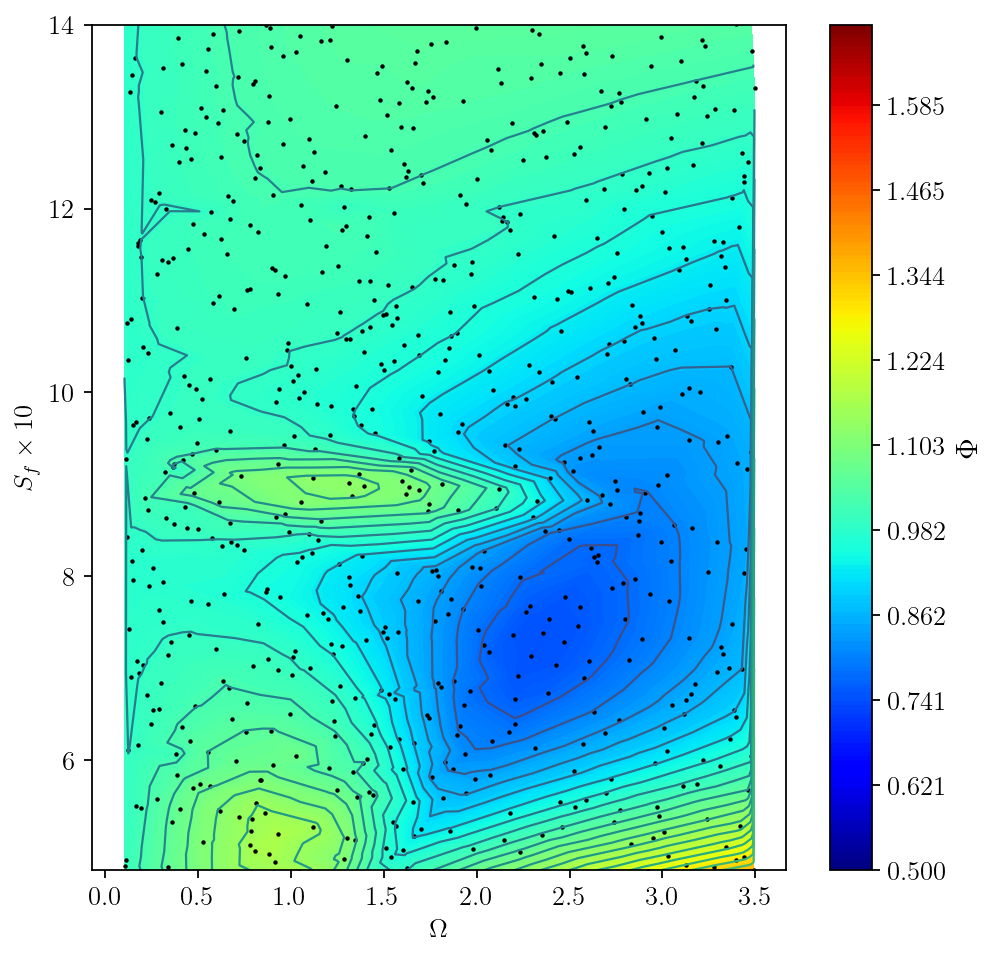

In [41]:
lim = [0.5,1.7]
w = [1,1]
fn_1 = (w[0]*((c_d**2+c_l**2)**.5) + w[1]*(((c_d_max-c_d_min)**2+(c_l_max-c_l_min)**2)**.5)) / uc_val
plot_data(fn_1, lim)
print(r"The  minima of the plot lies at value = {:.3f} with Ω = {:.3f} and Sf×10 = {:.3f}".format(np.min(fn_1), A
                                                                                                  [np.argmin(fn_1)], f[np.argmin(fn_1)]))


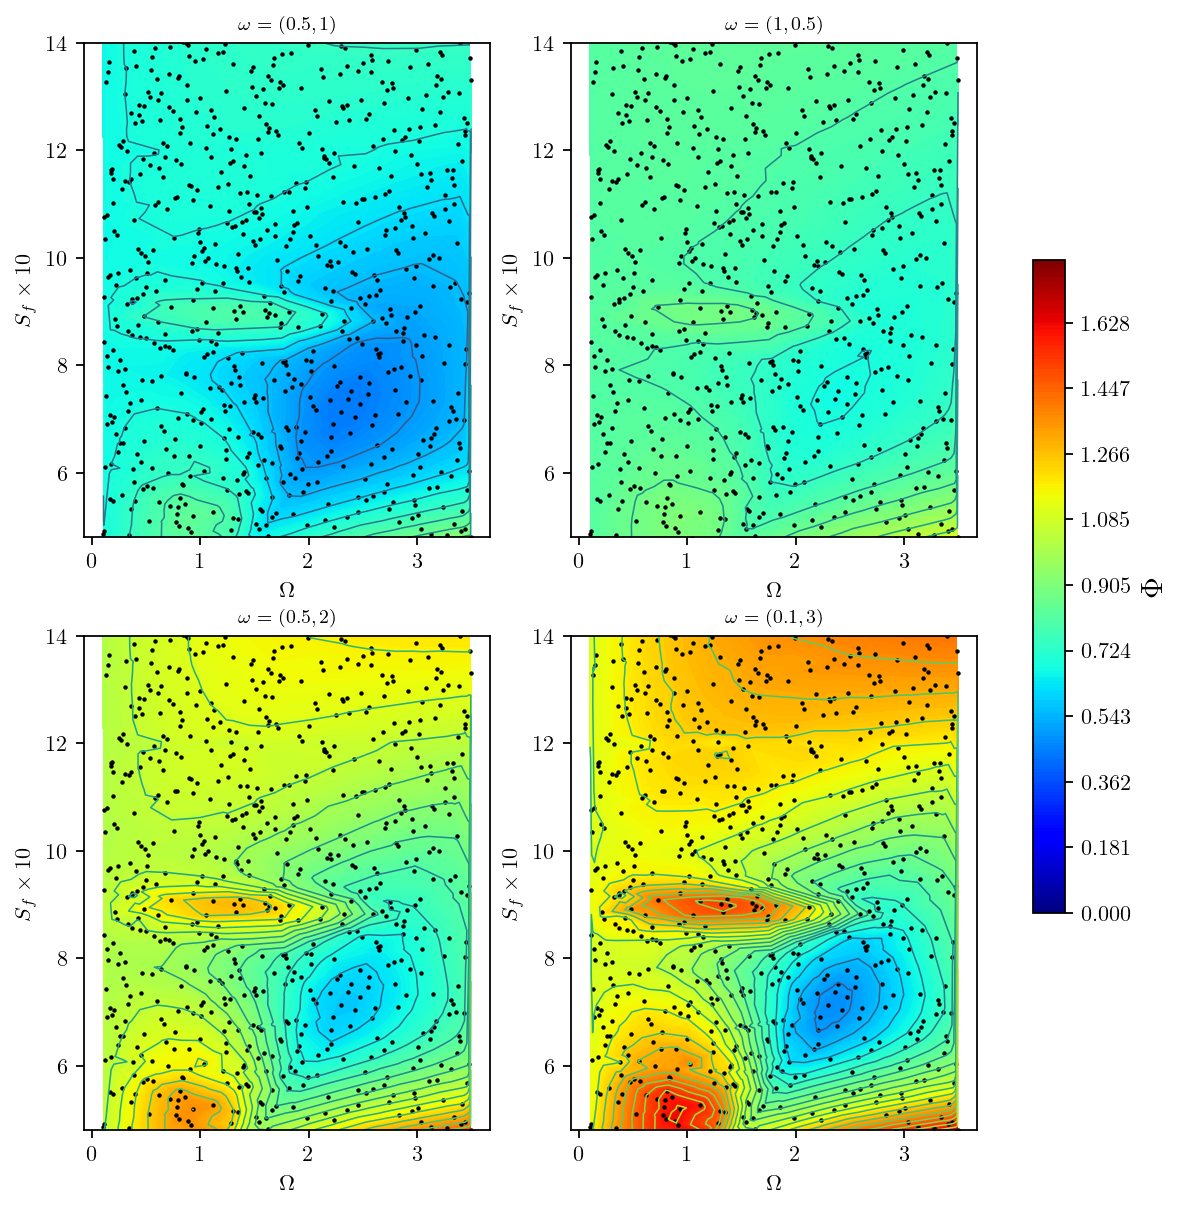

In [22]:
lim = [0,1.8]

levels = np.linspace(lim[0], lim[1], 200)
levels_line = np.linspace(lim[0], lim[1], 50)

w = [0.5,1]
fn_1 = (w[0]*((c_d**2+c_l**2)**.5) + w[1]*(((c_d_max-c_d_min)**2+(c_l_max-c_l_min)**2)**.5)) / uc_val

w = [1,0.5]
fn_2 = (w[0]*((c_d**2+c_l**2)**.5) + w[1]*(((c_d_max-c_d_min)**2+(c_l_max-c_l_min)**2)**.5)) / uc_val

w = [0.5,2]
fn_3 = (w[0]*((c_d**2+c_l**2)**.5) + w[1]*(((c_d_max-c_d_min)**2+(c_l_max-c_l_min)**2)**.5)) / uc_val

w = [0.1,3]
fn_4 = (w[0]*((c_d**2+c_l**2)**.5) + w[1]*(((c_d_max-c_d_min)**2+(c_l_max-c_l_min)**2)**.5)) / uc_val

fn = [[fn_1, fn_2], [fn_3, fn_4]]
Title = [[r"$\omega=(0.5,1)$",r"$\omega=(1,0.5)$"],[r"$\omega=(0.5,2)$",r"$\omega=(0.1,3)$"]]

fig, axs = plt.subplots(2, 2, figsize=(9, 9))
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        levels = np.linspace(lim[0], lim[1], 200)
        levels_line = np.linspace(lim[0], lim[1], 30)
        cntr2 = ax.tricontourf(A, f, fn[row][col], levels=levels, cmap="jet")
        ax.tricontour(A, f, fn[row][col], levels=levels_line, linewidths=0.7)
        ax.scatter(A, f, s=1, color ='k')
        ax.tick_params(labelsize=10)
        ax.set_xlabel(r"$\Omega$", fontsize=10)
        ax.set_ylabel(r"$S_f \times 10$", fontsize=10)
        ax.set_ylim(4.8,14)
        ax.title.set_text(Title[row][col])
        
cbar=fig.colorbar(cntr2, ax=axs[:, :], location='right', shrink=0.6)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel(r"$\Phi$", fontsize=14)
fig.savefig('LHS_data_weight.png')